# Zero to Hero

## 2.01 Optimizacion Bayesiana

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### Advertencia

### El código

In [12]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
require("smoof")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2134475,114.0,3997768,213.6,2882152,154
Vcells,3699102,28.3,8388608,64.0,7992138,61


Installing package into 'C:/Users/marco/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'DiceKriging' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marco\AppData\Local\Temp\RtmpqYMdpr\downloaded_packages


Loading required package: DiceKriging

Warning message:
"package 'DiceKriging' was built under R version 4.2.3"

Attaching package: 'DiceKriging'


The following object is masked from 'package:checkmate':

    checkNames




### Defino la funcion a optimizar, un polinomio de grado 4

In [13]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

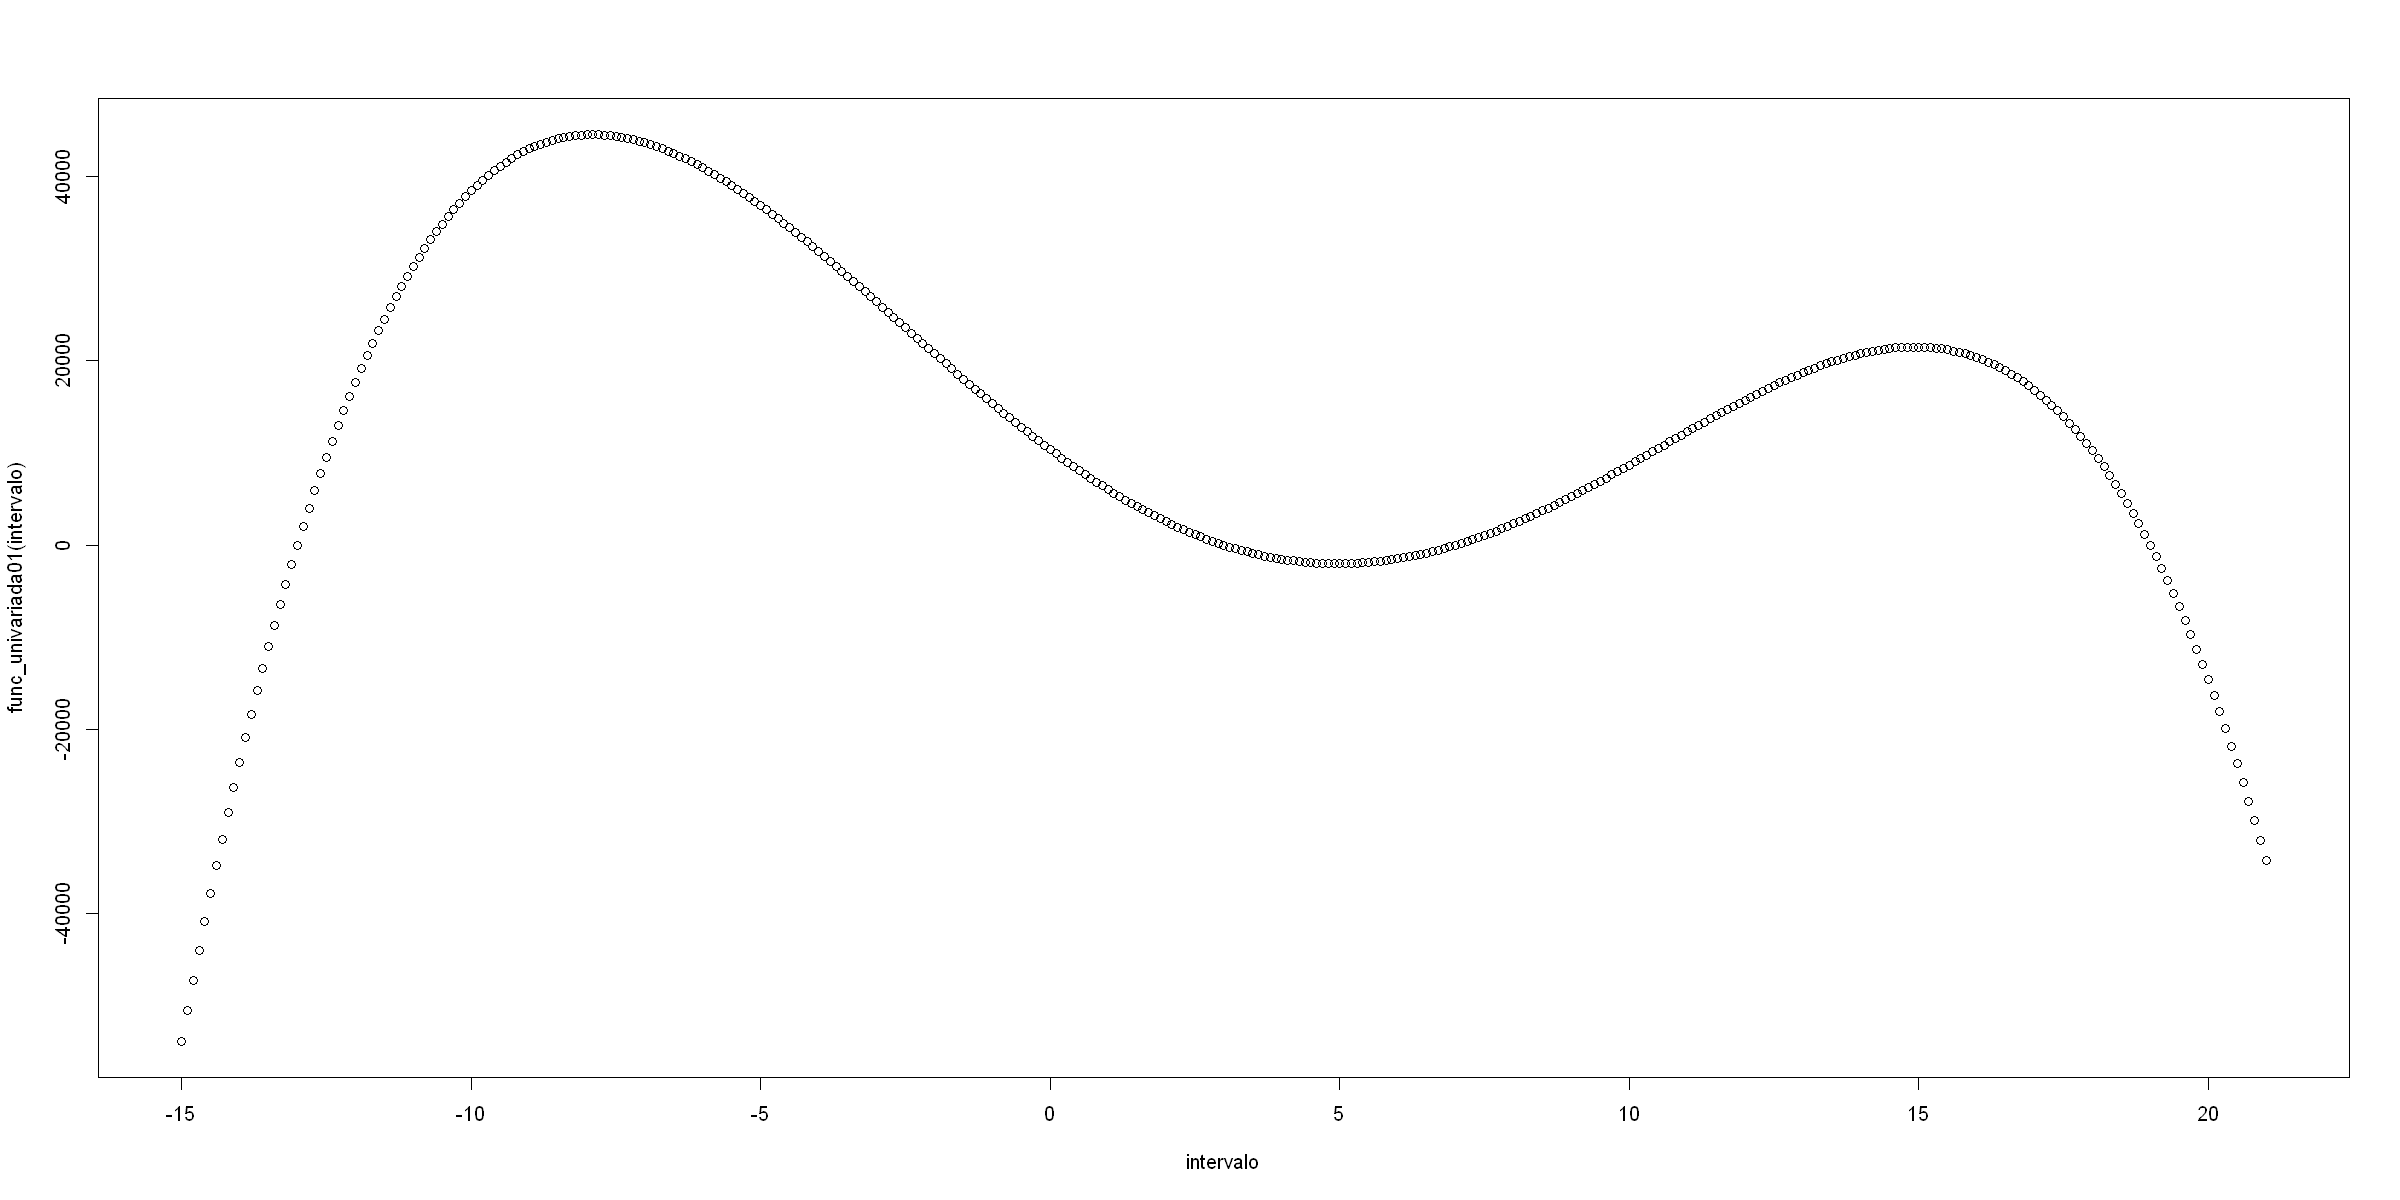

In [7]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [14]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [15]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [16]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [17]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=34.6 : y = -1.29e+06 : 0.0 secs : initdesign

[mbo] 0: x=-13.3 : y = -5.51e+03 : 0.0 secs : initdesign

[mbo] 0: x=69.5 : y = -3.46e+07 : 0.0 secs : initdesign

[mbo] 0: x=-62.4 : y = -3.65e+07 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -72.59869 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       72.599  |proj g|=     0.020889
At iterate     1  f =       72.598  |proj g|=      0.020889
ys=-3.612e-09  -gs= 4.363e-04, BFGS update SKIPPED
At iterate     2  f =       72.457  |proj g|=        0.0172
At iterate     3  f =        72.38  |proj g|=             0

iterations 3
function evaluations 8
segments explored during Cauchy searches 3
BFGS updates skipped 1
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 72.3802

F = 72.3802
final  value 72.380195 
converged


[mbo] 1: x=-23.9 : y = -7.81e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -90.18094 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       90.181  |proj g|=     0.056553
At iterate     1  f =       90.178  |proj g|=      0.056495
At iterate     2  f =       89.874  |proj g|=     0.0077554
At iterate     3  f =        89.86  |proj g|=     0.0051068
At iterate     4  f =       89.853  |proj g|=     0.0026508
At iterate     5  f =       89.852  |proj g|=    0.00051949
At iterate     6  f =       89.852  |proj g|=    4.3929e-05
At iterate     7  f =       89.852  |proj g|=     8.069e-07
At iterate     8  f =       89.852  |proj g|=    1.2277e-09

iterations 8
function evaluations 

[mbo] 2: x=17.3 : y = 1.53e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -106.9843 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       106.98  |proj g|=     0.002672
At iterate     1  f =       106.98  |proj g|=     0.0026698
At iterate     2  f =       106.98  |proj g|=    0.00039317
At iterate     3  f =       106.98  |proj g|=    4.7703e-05
At iterate     4  f =       106.98  |proj g|=    7.3566e-07
At iterate     5  f =       106.98  |proj g|=    1.4046e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.40457e-09
final functio

[mbo] 3: x=2.24 : y = 1.84e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -123.2057 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       123.21  |proj g|=   4.3048e-05
At iterate     1  f =       123.21  |proj g|=    4.3027e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.30271e-05
final function value 123.206

F = 123.206
final  value 123.205736 
converged


[mbo] 4: x=25.8 : y = -2.29e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -138.4962 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        138.5  |proj g|=   2.4405e-05
At iterate     1  f =        138.5  |proj g|=    2.4398e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.43984e-05
final function value 138.496

F = 138.496
final  value 138.496234 
converged


[mbo] 5: x=9.67 : y = 7.54e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -153.2192 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       153.22  |proj g|=   0.00056575
At iterate     1  f =       153.22  |proj g|=    0.00056564

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000565638
final function value 153.219

F = 153.219
final  value 153.219173 
converged


[mbo] 6: x=-5.47 : y = 3.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -167.8034 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        167.8  |proj g|=   0.00073185
At iterate     1  f =        167.8  |proj g|=    0.00073178
At iterate     2  f =        167.8  |proj g|=    9.0712e-05
At iterate     3  f =        167.8  |proj g|=    9.5983e-06
At iterate     4  f =        167.8  |proj g|=    1.1106e-07
At iterate     5  f =        167.8  |proj g|=    1.3799e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.37989e-10
final functio

[mbo] 7: x=-18.1 : y = -1.99e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -181.9236 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       181.92  |proj g|=    7.539e-05
At iterate     1  f =       181.92  |proj g|=    7.5383e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.53835e-05
final function value 181.924

F = 181.924
final  value 181.923634 
converged


[mbo] 8: x=-9.21 : y = 4.23e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -195.3224 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       195.32  |proj g|=    0.0002776
At iterate     1  f =       195.32  |proj g|=    0.00027758

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000277584
final function value 195.322

F = 195.322
final  value 195.322353 
converged


[mbo] 9: x=13.6 : y = 2.01e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -208.654 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       208.65  |proj g|=   0.00010821
At iterate     1  f =       208.65  |proj g|=     0.0001082

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000108204
final function value 208.654

F = 208.654
final  value 208.653962 
converged


[mbo] 10: x=-1.69 : y = 1.91e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -221.8645 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       221.86  |proj g|=   6.0559e-05
At iterate     1  f =       221.86  |proj g|=    6.0557e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.05566e-05
final function value 221.865

F = 221.865
final  value 221.864537 
converged


[mbo] 11: x=5.99 : y = -1.49e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -234.9256 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       234.93  |proj g|=   7.3457e-05
At iterate     1  f =       234.93  |proj g|=    7.3454e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.34542e-05
final function value 234.926

F = 234.926
final  value 234.925553 
converged


[mbo] 12: x=20.8 : y = -3e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -248.1482 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       248.15  |proj g|=   3.0491e-05
At iterate     1  f =       248.15  |proj g|=     3.049e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.049e-05
final function value 248.148

F = 248.148
final  value 248.148207 
converged


[mbo] 13: x=-7.37 : y = 4.43e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -260.2098 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       260.21  |proj g|=    0.0008309
At iterate     1  f =       260.21  |proj g|=    0.00083087
At iterate     2  f =       260.21  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 260.205

F = 260.205
final  value 260.205310 
converged


[mbo] 14: x=-11.1 : y = 2.96e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -272.395 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       272.39  |proj g|=    0.0040154
At iterate     1  f =       272.39  |proj g|=     0.0040151
At iterate     2  f =       272.27  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 272.272

F = 272.272
final  value 272.272308 
converged


[mbo] 15: x=-3.67 : y = 3.01e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -284.2179 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       284.22  |proj g|=    0.0019705
At iterate     1  f =       284.22  |proj g|=     0.0019704
At iterate     2  f =       284.21  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 284.215

F = 284.215
final  value 284.214961 
converged


[mbo] 16: x=11.7 : y = 1.48e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -296.2379 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       296.24  |proj g|=    0.0025593
At iterate     1  f =       296.24  |proj g|=     0.0025591
At iterate     2  f =       296.24  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 296.237

F = 296.237
final  value 296.237419 
converged


[mbo] 17: x=15.5 : y = 2.12e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -308.1756 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       308.18  |proj g|=       0.0045
At iterate     1  f =       308.18  |proj g|=     0.0044996
At iterate     2  f =       308.09  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 308.093

F = 308.093
final  value 308.093347 
converged


[mbo] 18: x=0.227 : y = 9.33e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -320.2696 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       320.27  |proj g|=    0.0074965
At iterate     1  f =       320.27  |proj g|=     0.0074957
At iterate     2  f =       320.02  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 320.018

F = 320.018
final  value 320.017850 
converged


[mbo] 19: x=-8.27 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -330.8824 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       330.88  |proj g|=    0.0049554
At iterate     1  f =       330.88  |proj g|=     0.0049551
At iterate     2  f =       330.85  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 330.848

F = 330.848
final  value 330.848064 
converged


[mbo] 20: x=-6.46 : y = 4.24e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -341.6873 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       341.69  |proj g|=    0.0057932
At iterate     1  f =       341.69  |proj g|=     0.0057928
At iterate     2  f =       341.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 341.636

F = 341.636
final  value 341.636083 
converged


[mbo] 21: x=7.84 : y = 1.88e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -353.4628 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       353.46  |proj g|=    0.0064522
At iterate     1  f =       353.46  |proj g|=     0.0064516
At iterate     2  f =       353.41  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 353.408

F = 353.408
final  value 353.408046 
converged


[mbo] 22: x=18.9 : y = 1.19e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -365.117 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       365.12  |proj g|=    0.0064836
At iterate     1  f =       365.12  |proj g|=     0.0064831
At iterate     2  f =       365.11  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 365.111

F = 365.111
final  value 365.111390 
converged


[mbo] 23: x=4.09 : y = -1.62e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -376.8904 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       376.89  |proj g|=    0.0079322
At iterate     1  f =       376.89  |proj g|=     0.0079314
At iterate     2  f =       376.81  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 376.815

F = 376.815
final  value 376.814963 
converged


[mbo] 24: x=-10 : y = 3.82e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -387.5762 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       387.58  |proj g|=    0.0087274
At iterate     1  f =       387.58  |proj g|=     0.0087265
At iterate     2  f =       387.49  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 387.485

F = 387.485
final  value 387.485316 
converged


[mbo] 25: x=-4.63 : y = 3.51e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  263.7778 
  - best initial criterion value(s) :  -398.1464 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       398.15  |proj g|=    0.0087671
At iterate     1  f =       398.15  |proj g|=     0.0087663
At iterate     2  f =       398.11  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 398.108

F = 398.108
final  value 398.108184 
converged


In [18]:
tb_resultados  <- as.data.table( run$opt.path )

In [19]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
34.5649806,-1288335.927,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-13.2593752,-5512.445,0,NA,NA,0.01,NA,NA,NA,initdesign,NA,NA,NA
69.4979717,-34627530.774,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-62.3909290,-36481560.429,0,NA,NA,0.00,NA,NA,NA,initdesign,NA,NA,NA
-23.9284718,-781456.905,1,NA,NA,0.00,-1359468.656,NA,0.06,infill_ei,0.17,17472003.06,-1.810073e+07
17.2715924,15339.869,2,NA,NA,0.00,-3303718.016,NA,0.01,infill_ei,0.19,13526158.27,-4.885152e+06
2.2425007,1841.011,3,NA,NA,0.00,-1797001.251,NA,0.01,infill_ei,0.21,5567863.35,-8.920314e+05
25.8433901,-228843.202,4,NA,NA,0.00,-956604.724,NA,0.02,infill_ei,0.26,1839724.28,4.245064e+05
9.6709108,7536.726,5,NA,NA,0.00,-461993.056,NA,0.01,infill_ei,0.18,1083851.04,7.330168e+04


In [20]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-8.27068,44394.91,19,NA,NA,0,-8232.317,NA,0.01,infill_ei,0.22,20383.2,44452.66


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?